# DL TEST 2 (March 1, 2020)

## Submitted by :- **JENIL GATHANI** (**J061**)  

In [1]:
import pandas as pd
import numpy as np
import os
import random
import shutil  
import urllib.request
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras import models
from keras.datasets import cifar10
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import Activation, Flatten, Conv2D
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.preprocessing.image import ImageDataGenerator
import zipfile


Using TensorFlow backend.


In [0]:
url = "http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip"
urllib.request.urlretrieve(url, 'dataset.zip')

with zipfile.ZipFile("/content/dataset.zip","r") as zip_ref:
    zip_ref.extractall("data")

In [0]:
train_path ='/content/data/UCMerced_LandUse/Images'
os.mkdir('/content/data/UCMerced_LandUse/test')
os.mkdir('/content/data/UCMerced_LandUse/validation')
validation_path = '/content/data/UCMerced_LandUse/validation'
test_path  = '/content/data/UCMerced_LandUse/test'

train_folders = os.listdir(train_path)
validation_folders = os.listdir(validation_path)
test_folders = os.listdir(test_path)

In [4]:
for folder in train_folders:
    if folder != ".DS_Store":
        current_path = os.path.join(train_path,folder)
        files = os.listdir(current_path)
        files_to_move = files[-15:]
        v_destination = (os.path.join(validation_path, folder))
        t_destination = (os.path.join(test_path, folder))

        file_counter = 0
        for file in files_to_move:
            if file_counter <= 10:
              source = os.path.join(current_path,file)
              print(source)
              if os.path.exists(v_destination):
                dest = shutil.copy(source, v_destination)
                os.remove(source)
                print(source, "moved to" , v_destination)
                file_counter = file_counter + 1
              else:
                os.mkdir(v_destination)
                dest = shutil.copy(source, v_destination)
                os.remove(source)
                print(source, "moved to" , v_destination)
                file_counter = file_counter + 1
            else:
              source = os.path.join(current_path,file)
              print(source)
              if os.path.exists(t_destination):
                dest = shutil.copy(source, t_destination)
                os.remove(source)
                print(source, "moved to" , t_destination)
                file_counter = file_counter + 1
              else:
                os.mkdir(t_destination)
                dest = shutil.copy(source, t_destination)
                os.remove(source)
                print(source, "moved to" , t_destination)
                file_counter = file_counter + 1


/content/data/UCMerced_LandUse/Images/freeway/freeway33.tif
/content/data/UCMerced_LandUse/Images/freeway/freeway33.tif moved to /content/data/UCMerced_LandUse/validation/freeway
/content/data/UCMerced_LandUse/Images/freeway/freeway05.tif
/content/data/UCMerced_LandUse/Images/freeway/freeway05.tif moved to /content/data/UCMerced_LandUse/validation/freeway
/content/data/UCMerced_LandUse/Images/freeway/freeway50.tif
/content/data/UCMerced_LandUse/Images/freeway/freeway50.tif moved to /content/data/UCMerced_LandUse/validation/freeway
/content/data/UCMerced_LandUse/Images/freeway/freeway62.tif
/content/data/UCMerced_LandUse/Images/freeway/freeway62.tif moved to /content/data/UCMerced_LandUse/validation/freeway
/content/data/UCMerced_LandUse/Images/freeway/freeway63.tif
/content/data/UCMerced_LandUse/Images/freeway/freeway63.tif moved to /content/data/UCMerced_LandUse/validation/freeway
/content/data/UCMerced_LandUse/Images/freeway/freeway45.tif
/content/data/UCMerced_LandUse/Images/freeway

In [5]:
# Path to the train folder
original_test = '/content/data/UCMerced_LandUse/test'
categories = os.listdir(original_test)
files_list = []
categories_list = []
for category in categories:
   category_path = os.path.join(original_test,category)

   files = os.listdir(category_path)
   for file_name in files:
     files_list.append(str(category) + "/" + file_name)
     categories_list.append(category)

print(len(files_list))
print(len(categories_list))
data_test = pd.DataFrame({'filename':files_list,'label':categories_list})

data_test.to_csv("original_test.csv",index=False)

84
84


In [6]:
# Data Augmentation & Also Image generator 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



train_generator = train_datagen.flow_from_directory(
    directory=r"/content/data/UCMerced_LandUse/Images",
    target_size=(70, 70),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

valid_generator = test_datagen.flow_from_directory(
    directory=r"/content/data/UCMerced_LandUse/validation",
    target_size=(70, 70),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory="/content/data/UCMerced_LandUse/test",
    target_size=(70, 70),
    color_mode="rgb",
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)

Found 1785 images belonging to 21 classes.
Found 231 images belonging to 21 classes.
Found 84 images belonging to 21 classes.


In [7]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size


model = Sequential() #model = sequential 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(70,70,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten()) #make layer flatten
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Model Summary

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)         

loss vs epochs and accuracy vs epochs - on train and validation

In [13]:
# Creating a model & Fitting on train data
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs= 30)

Epoch 1/30
55/55 [==============================] - 4s 78ms/step - loss: 0.7974 - acc: 0.7343 - val_loss: 0.8905 - val_acc: 0.7054
Epoch 2/30
55/55 [==============================] - 4s 77ms/step - loss: 0.8013 - acc: 0.7317 - val_loss: 0.9618 - val_acc: 0.6935
Epoch 3/30
55/55 [==============================] - 4s 77ms/step - loss: 0.7987 - acc: 0.7317 - val_loss: 0.9368 - val_acc: 0.7286
Epoch 4/30
55/55 [==============================] - 4s 76ms/step - loss: 0.7711 - acc: 0.7449 - val_loss: 0.9297 - val_acc: 0.6834
Epoch 5/30
55/55 [==============================] - 4s 76ms/step - loss: 0.7742 - acc: 0.7396 - val_loss: 0.8513 - val_acc: 0.7085
Epoch 6/30
55/55 [==============================] - 4s 77ms/step - loss: 0.7336 - acc: 0.7494 - val_loss: 0.9655 - val_acc: 0.7286
Epoch 7/30
55/55 [==============================] - 4s 73ms/step - loss: 0.6447 - acc: 0.7793 - val_loss: 0.9474 - val_acc: 0.7286
Epoch 8/30
55/55 [==============================] - 4s 75ms/step - loss: 0.7094 - a

In [14]:
# Making predictions on test data
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices = []
for i in pred:
        predicted_class_indices.append(np.argmax(np.asarray(i)))

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv("results.csv",index=False)

84/84 [==============================] - 0s 2ms/step


In [0]:
# Kaggle Format - Creating a Final Dataframe which contains the test file names, the actual label and the predicted label
final_pred_df = pd.DataFrame(columns = ["filename", "label","pred"])
filename_list = []
label_list = []
pred_list = []

for filename in results["Filename"]:
  # print(filename)
  filename_list.append(filename)
  label_list.append(data_test[data_test["filename"] == filename]["label"].values[0])
  pred_list.append(results[results["Filename"] == filename]["Predictions"].values[0])

final_pred_df["filename"] = filename_list
final_pred_df["label"] = label_list
final_pred_df["pred"] = pred_list
final_pred_df.to_csv("final.csv")

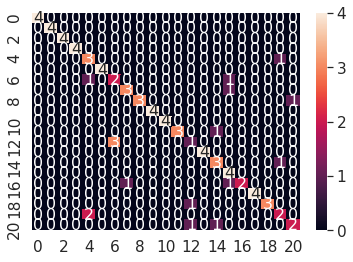

In [16]:
# Confusion matrix for better visualization 
cm=confusion_matrix(final_pred_df['label'],final_pred_df['pred'])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

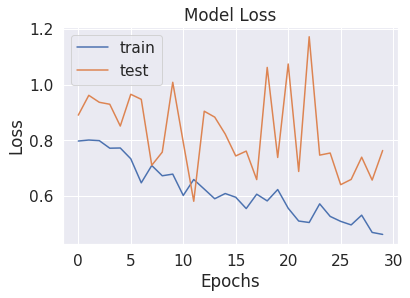

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

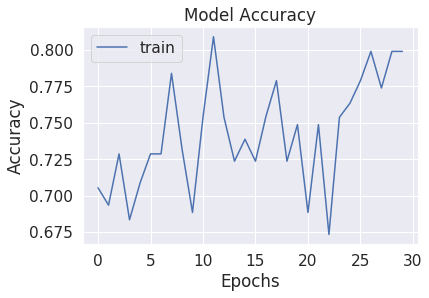

In [18]:
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()